THIS IS MY FIRST PROJECT IN 2025 FOR DATA ANALYSIS IN EDA. I WILL USE NUMPY,PANDAS,MATPLOTLIB,SEABORN AND CLEAN,VISUALIZE THE DATA, I TOOK THE STRUCTURED DATA FROM KAGGLE (CSV FILE)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("customer churn.csv")


FIRST WE NEED TO INSPECT THE DATA WE HAVE

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


WE ARE REPLACING THE BLAK VALUE WITH 0 AND CHNAGED THE DATATYPE TO FLOAT FROM OBJECT

In [20]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")

In [22]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
df["SeniorCitizen"]=df["SeniorCitizen"].count()

NOW WE WILL CONVERT THE DATA IN A COLUMN - SENIOR CITIZEN (0,1) TO (YES,NO) CONDITIONAL CONVERSION

In [47]:
def conv(value):

    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [51]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,no,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,no,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


CREATED A COUNTPLOT USING SEABORN FOR COUNTING NO OF CHURNS AND NO OF PAPERLESSBILLINGS

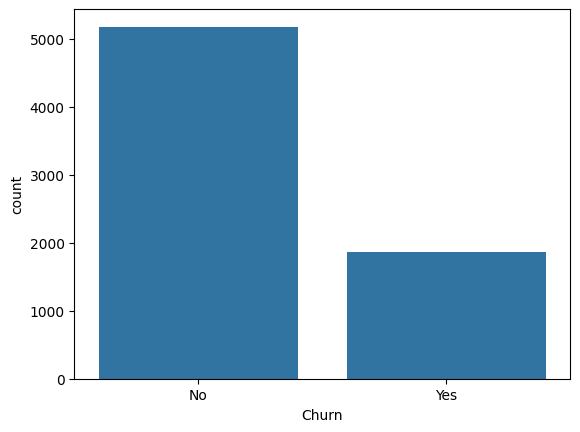

In [61]:
sns.countplot(x= 'Churn', data= df)
plt.show()

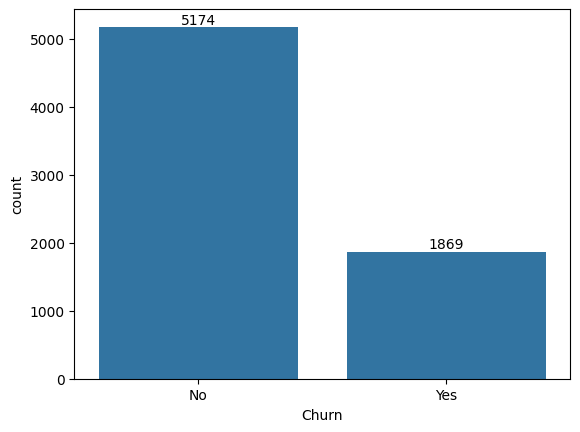

In [64]:
bc = sns.countplot(x= 'Churn', data= df)
bc.bar_label(bc.containers[0])
plt.show()

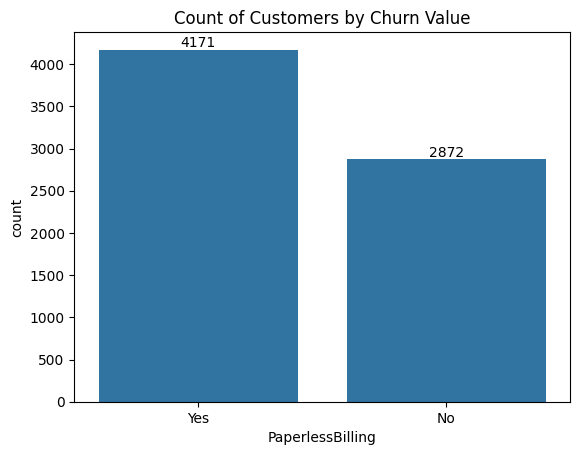

In [99]:
rd= sns.countplot(x = df["PaperlessBilling"])
rd.bar_label(rd.containers[0])
plt.title("Count of Customers by Churn Value")
plt.show()


NOW WE WANT TO REPRESENT CHURN IN PERCENTAGE, SO WE USE PIE CHART AND ADD LABLES,PERCENTAGE

ValueError: could not convert string to float: 'No'

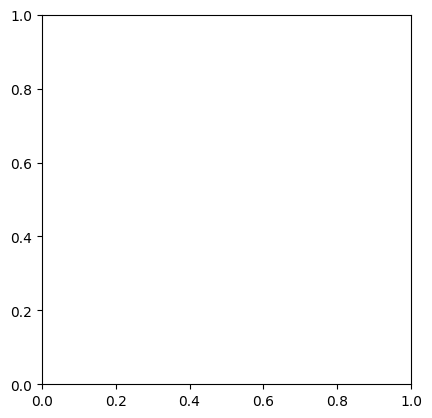

In [79]:
plt.pie(df['Churn'])
plt.show()

NOW THE ABOVE ERROR SAYS DATATYPE STRING CANNOT BE CONVERTED TO "FLOAT" SO WE USE GROUP BY

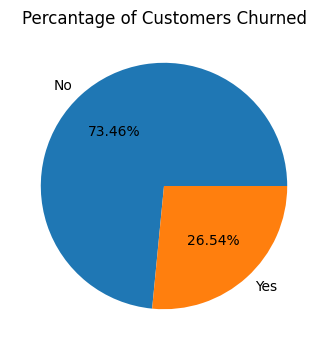

In [107]:
plt.figure(figsize=(4,4))
gr = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gr["Churn"], labels= gr.index, autopct= "%1.2f%%")
plt.title("Percantage of Customers Churned")
plt.show()


FROM THE ABOVE PIE CHART WE CAN SEE THAT 26.54% CUSTOMERS HAVE CHURNED
NOW LETS SEE WHAT IS THE REASON BEHIND IT

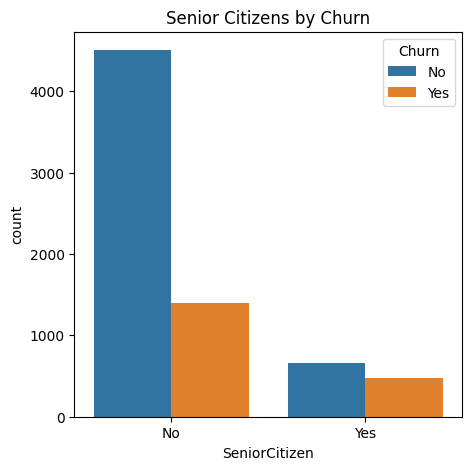

In [163]:
plt.figure(figsize=(5,5))
ss= sns.countplot(x= 'SeniorCitizen', data = df, hue= "Churn")
ss.bar_label=ss.containers[0]
plt.title("Senior Citizens by Churn")
plt.show()

Churn Distribution Among Senior Citizens (Stacked Percentage Chart)

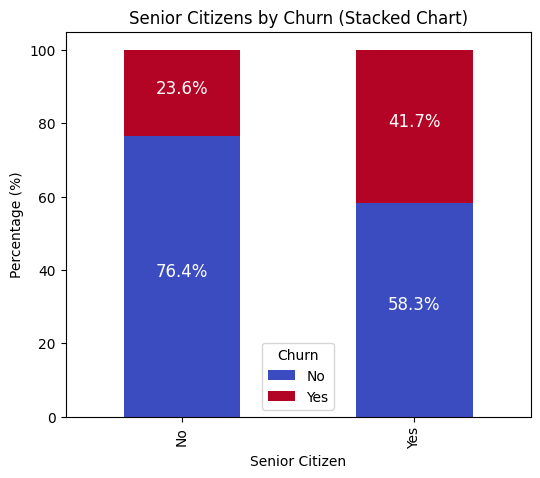

In [165]:

count_df = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
count_df_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Create the Stacked Bar Plot
count_df_percentage.plot(kind='bar', stacked=True, figsize=(6,5), colormap="coolwarm")

# Add percentage labels
for i, (index, row) in enumerate(count_df_percentage.iterrows()):
    bottom = 0
    for col in count_df_percentage.columns:
        percentage = row[col]
        plt.text(i, bottom + percentage / 2, f"{percentage:.1f}%", ha='center', color='white', fontsize=12)
        bottom += percentage  # Move label position up

# Set Labels and Title
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.title("Senior Citizens by Churn (Stacked Chart)")
plt.legend(title="Churn")
plt.show()

COUNT OF SENIOR CITIZENS

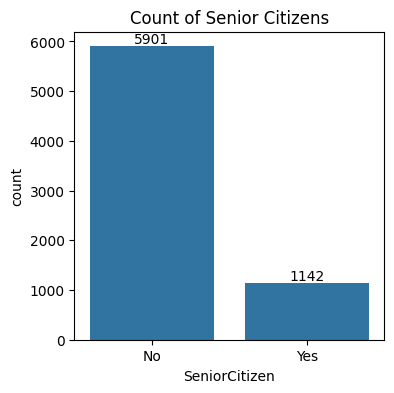

In [174]:
plt.figure(figsize=(4,4))
sss= sns.countplot(x= 'SeniorCitizen', data=df)
sss.bar_label(sss.containers[0])
plt.title("Count of Senior Citizens")
plt.show()

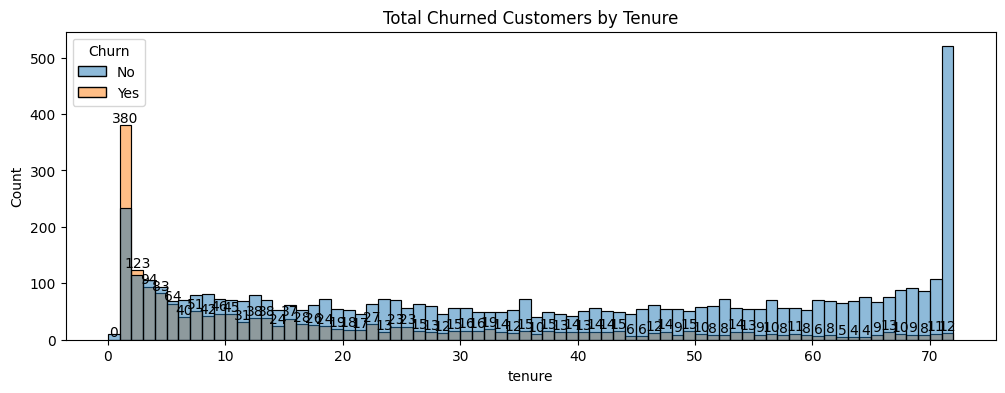

In [194]:
plt.figure(figsize=(12,4))
num= sns.histplot(x= "tenure", data=df, hue= "Churn", bins=72)
num.bar_label(num.containers[0])
plt.title("Total Churned Customers by Tenure")
plt.show()

In [190]:
print(df["tenure"].max())

72


PEOPLE WHO HAVE USED OUR SERVICES FOR LONG TIME STAYED AND SHORT TERM CHURNED

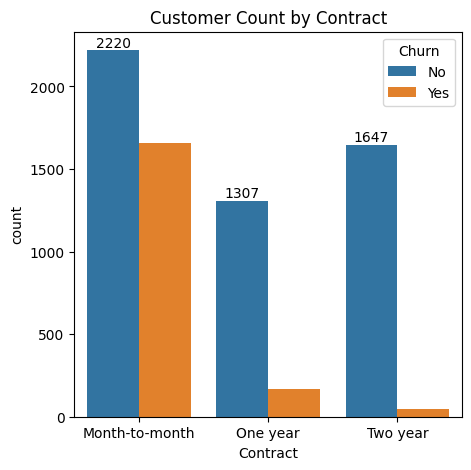

In [202]:
plt.figure(figsize=(5,5))
cc= sns.countplot(x= "Contract", data= df, hue= "Churn")
cc.bar_label(cc.containers[0])
plt.title("Customer Count by Contract")
plt.show()

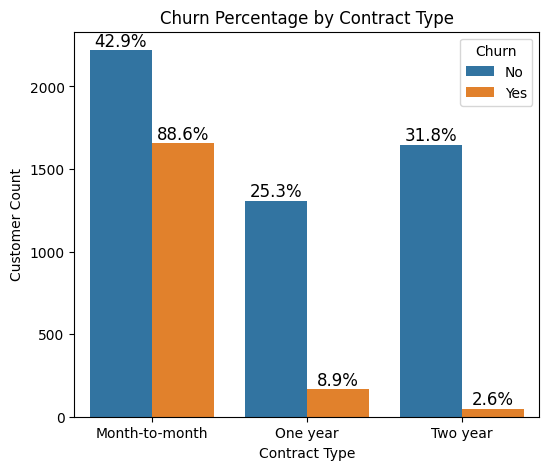

In [201]:
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_percentage = contract_churn_counts.div(contract_churn_counts.sum(axis=1), axis=0) * 100

# Plot the percentage-based countplot
plt.figure(figsize=(6,5))
cc = sns.countplot(x="Contract", data=df, hue="Churn")

# Add percentage labels to the bars
for container, churn_label in zip(cc.containers, df['Churn'].unique()):
    for bar in container:
        height = bar.get_height()
        total = sum([b.get_height() for b in container])  # Get total for percentage calculation
        percentage = (height / total) * 100 if total > 0 else 0
        cc.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12, color='black')

# Set Titles and Labels
plt.title("Churn Percentage by Contract Type")
plt.ylabel("Customer Count")
plt.xlabel("Contract Type")
plt.legend(title="Churn", loc='upper right')
plt.show()

Aove(Churn Percentage by Contract Type)


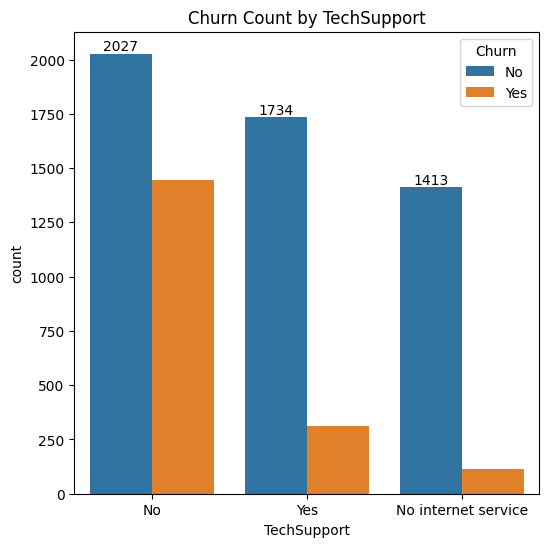

In [208]:
plt.figure(figsize=(6,6))
n= sns.countplot(x = "TechSupport", data=df, hue= "Churn")
n.bar_label(n.containers[0])
plt.title("Churn Count by TechSupport")
plt.show()


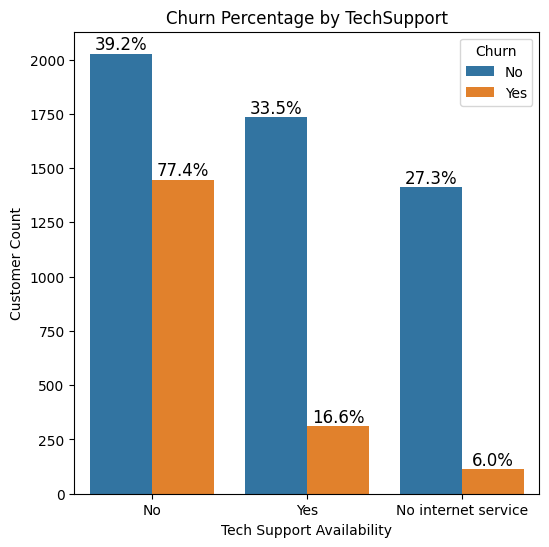

In [210]:
techsupport_churn_counts = df.groupby(["TechSupport", "Churn"]).size().unstack()
techsupport_churn_percentage = techsupport_churn_counts.div(techsupport_churn_counts.sum(axis=1), axis=0) * 100

# Create Count Plot
plt.figure(figsize=(6,6))
n = sns.countplot(x="TechSupport", data=df, hue="Churn")

# Add percentage labels to the bars
for container in n.containers:
    for bar in container:
        height = bar.get_height()
        total = sum([b.get_height() for b in container])  # Total for percentage calculation
        percentage = (height / total) * 100 if total > 0 else 0
        n.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, height),
                   ha='center', va='bottom', fontsize=12, color='black')

# Set Titles and Labels
plt.title("Churn Percentage by TechSupport")
plt.ylabel("Customer Count")
plt.xlabel("Tech Support Availability")
plt.legend(title="Churn", loc='upper right')
plt.show()

#From the above clustered bar chart we can cleary say that the Churn percentage is more when there is no Tech Support

In [218]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

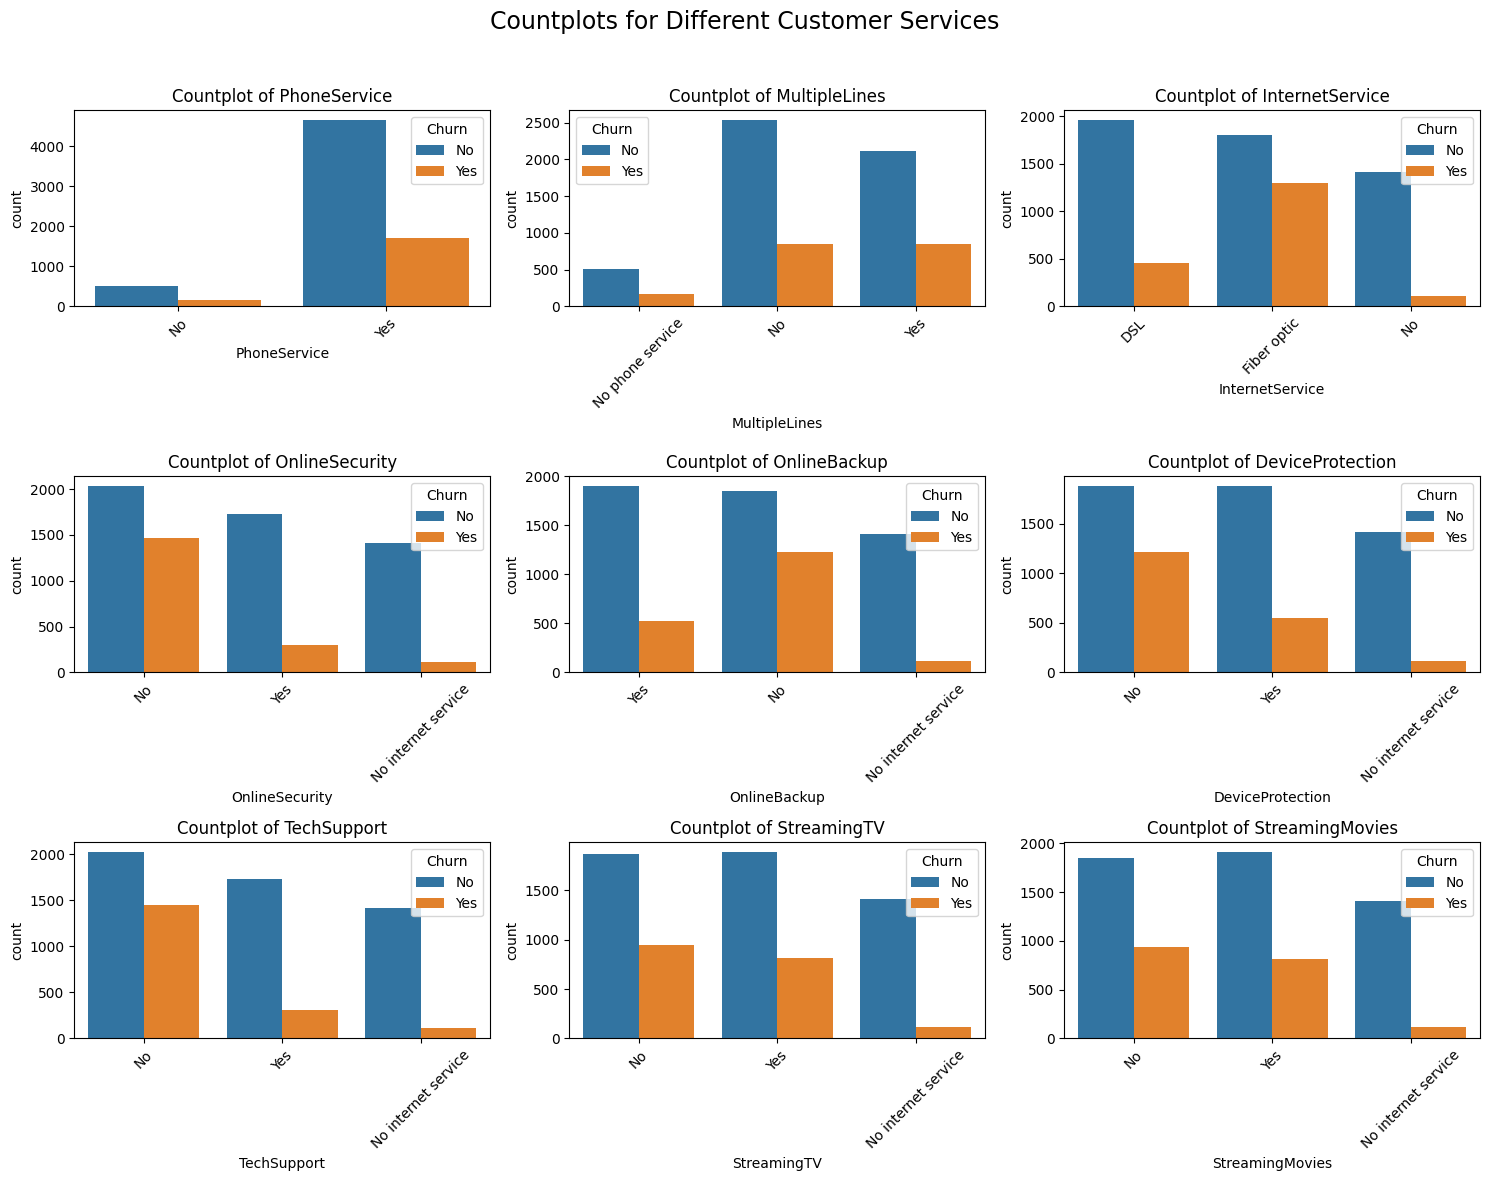

In [221]:


# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust grid size based on number of columns
fig.suptitle("Countplots for Different Customer Services", fontsize=17)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Generate a countplot for each column
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue= "Churn")  # Create countplot
    axes[i].set_title(f"Countplot of {col}")   # Set title
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make space for the main title
plt.show()


#Customers without internet-related services (Online Security, Online Backup, Device Protection, Tech Support) tend to have a higher churn rate compared to those who use these services.
Phone service is widely used, but multiple lines are not as common, and customers with multiple lines have a slightly higher churn rate.
Fiber optic internet users show a higher churn rate compared to DSL users, suggesting potential dissatisfaction.
Streaming services (Streaming TV & Movies) do not have a significant impact on churn, as both churned and non-churned customers have similar distribution patterns.

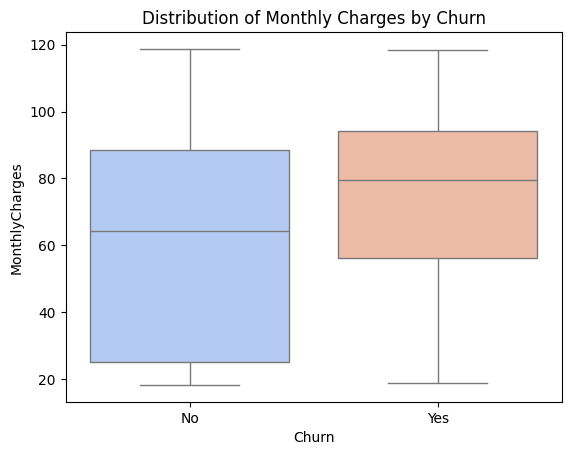

In [226]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm", hue= "Churn")
plt.title("Distribution of Monthly Charges by Churn")
plt.show()
